#### Question 5 

Recreated the Covid data source from the two .csv. files.


In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

df_covid_2020 = pd.read_csv(r'C:\Users\HP\Downloads\2020 Cases only-1.csv', low_memory=False)
df_covid_2021 = pd.read_csv(r'C:\Users\HP\Downloads\2021 Cases only-1.csv', low_memory = False)


df_covid_2021.head()

,County,Age,Age_group,Gender,Jurisdicti,Travel_rel,Origin,EDvisit,Hospitaliz,Died,Case_,Contact,Case1,EventDate,ChartDate,ObjectId
0,Duval,44.0,35-44 years,Female,FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2021/01/13 05:00:00+00,1/13/2021,2021/01/13 05:00:00+00,65538
1,Dade,42.0,35-44 years,Female,FL resident,Unknown,NaN,NO,NO,NaN,Yes,Yes,2021/01/13 05:00:00+00,1/6/2021,2021/01/13 05:00:00+00,65539
2,Duval,69.0,65-74 years,Female,FL resident,No,NaN,NO,NO,NaN,Yes,Yes,2021/01/13 05:00:00+00,1/8/2021,2021/01/13 05:00:00+00,65540
3,St. Johns,85.0,85+ years,Male,FL resident,No,NaN,YES,YES,NaN,Yes,NO,2021/01/13 05:00:00+00,1/12/2021,2021/01/13 05:00:00+00,65541
4,Dade,9.0,5-14 years,Female,FL resident,No,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NO,2021/01/13 05:00:00+00,1/10/2021,2021/01/13 05:00:00+00,65542


In [2]:
df_covid_all = df_covid_2020.append(df_covid_2021)

C:\Users\HP\AppData\Local\Temp\ipykernel_380\1960098528.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_covid_all = df_covid_2020.append(df_covid_2021)


In [3]:
covid_eventdates = df_covid_all.groupby(['EventDate']).count() 
covid_eventdates.head()

,OBJECTID,County,Age,Age_group,Gender,Jurisdicti,Travel_rel,Origin,EDvisit,Hospitaliz,Died,Case_,Contact,Case1,ChartDate,ObjectId2,ObjectId
EventDate,,,,,,,,,,,,,,,,,
1/1/2020,0,21,21,21,21,21,21,3,20,21,0,21,20,21,21,21,0
1/1/2021,0,13720,13719,13720,13720,13720,13720,482,13331,13717,230,13720,10611,13720,13720,0,13720
1/10/2020,0,2,2,2,2,2,2,0,2,2,0,2,2,2,2,2,0
1/10/2021,0,11694,11693,11694,11694,11694,11694,266,11415,11691,156,11694,8190,11694,11694,0,11694
1/11/2021,0,14249,14245,14249,14249,14249,14249,297,13636,14241,216,14249,10151,14249,14249,0,14249


In [4]:
type(covid_eventdates.index[0])
covid_eventdates.index = pd.to_datetime(covid_eventdates.index, format="%m/%d/%Y")

In [5]:
sorted_covid_events = covid_eventdates.sort_index(axis='index', ascending=True)
sorted_covid_events.head()

,OBJECTID,County,Age,Age_group,Gender,Jurisdicti,Travel_rel,Origin,EDvisit,Hospitaliz,Died,Case_,Contact,Case1,ChartDate,ObjectId2,ObjectId
EventDate,,,,,,,,,,,,,,,,,
2020-01-01,0,21,21,21,21,21,21,3,20,21,0,21,20,21,21,21,0
2020-01-02,0,4,4,4,4,4,4,0,4,4,1,4,4,4,4,4,0
2020-01-03,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0
2020-01-04,0,8,8,8,8,8,8,2,8,8,0,8,8,8,8,8,0
2020-01-05,0,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0


<AxesSubplot:xlabel='Date'>

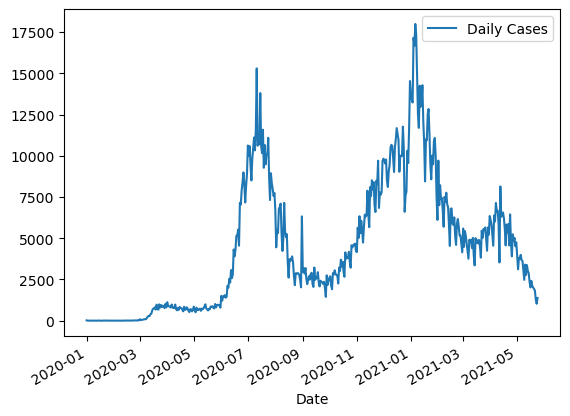

In [6]:

sorted_covid_events['Date'] =sorted_covid_events.index.values

sorted_covid_events['Daily Cases'] = sorted_covid_events['County']

sorted_covid_events.plot('Date', 'Daily Cases')

<AxesSubplot:xlabel='Date'>

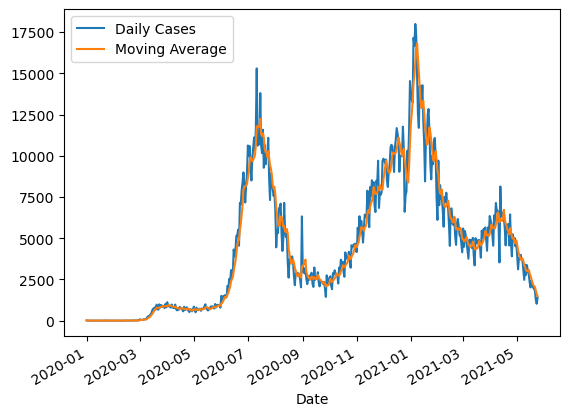

In [7]:

sorted_covid_events['Moving Average'] = sorted_covid_events['County'].rolling(5, min_periods=0).mean()
sorted_covid_events.plot('Date', ['Daily Cases','Moving Average'])


<AxesSubplot:xlabel='Date'>

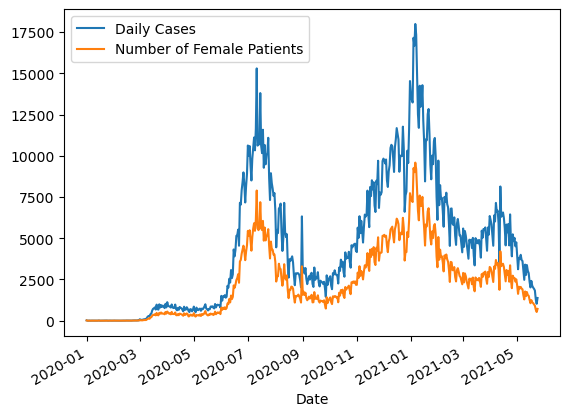

In [8]:

gender_list = df_covid_all['Gender'].to_list()

female_gender_list = []

for i in range(len(gender_list)):
    if gender_list[i] == "Female":
        female_gender_list.append(1)
    else:
        female_gender_list.append(0)

df_covid_all.insert(4,"Gender Coded", female_gender_list)
df_gender = df_covid_all.groupby(['EventDate']).sum(numeric_only = True)

df_gender.index = pd.to_datetime(df_gender.index, format="%m/%d/%Y")

df_gender_sorted = df_gender.sort_index(axis = 'index', ascending=True)

sorted_covid_events['Number of Female Patients'] = df_gender_sorted['Gender Coded']
sorted_covid_events.plot('Date', ['Daily Cases', 'Number of Female Patients'])

#### Question 6

Used the matplotlib.pyplot package to create a 2 by 2 visualization.  The first row showing daily cases and the moving average for Osceola County, and the second row showing this information for St Lucie County. Extracted the data for the two counties from the data source created in 5.

In [9]:
# Osceola County
Osceola_County = df_covid_all[df_covid_all['County'].isin(['Osceola'])]

Osceola_Event_Count = Osceola_County.groupby(['EventDate']).count() 

Osceola_Event_Count.index = pd.to_datetime(Osceola_Event_Count.index, format="%m/%d/%Y")

Osceola_County_Sorted = Osceola_Event_Count.sort_index(axis='index', ascending=True)

Osceola_County_Sorted['Date'] = Osceola_County_Sorted.index.values

Osceola_County_Sorted['Daily Cases'] = Osceola_County_Sorted['County']

Osceola = Osceola_County_Sorted

In [10]:
# St_Lucie County
St_Lucie_County = df_covid_all[df_covid_all['County'].isin(['St. Lucie'])]

St_Lucie_Event_Count = St_Lucie_County.groupby(['EventDate']).count() 

St_Lucie_Event_Count.index = pd.to_datetime(St_Lucie_Event_Count.index, format="%m/%d/%Y")

St_Lucie_County_Sorted = St_Lucie_Event_Count.sort_index(axis='index', ascending=True)

St_Lucie_County_Sorted['Date'] = St_Lucie_County_Sorted.index.values

St_Lucie_County_Sorted['Daily Cases'] = St_Lucie_County_Sorted['County']

St_Lucie = St_Lucie_County_Sorted

In [11]:
Osceola['Moving Average'] = Osceola['Daily Cases'].rolling(5,min_periods=0).mean()

St_Lucie['Moving Average'] = St_Lucie['Daily Cases'].rolling(5,min_periods=0).mean()

[]

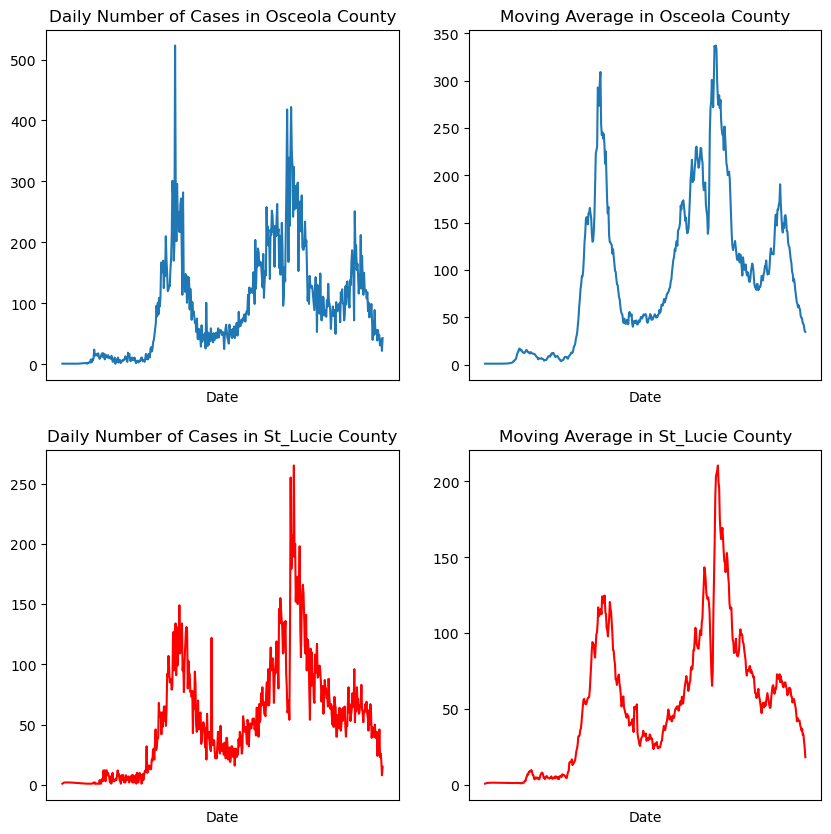

In [12]:

fig, h_axes = plt.subplots(2,2,figsize=[10,10])

plt.sca(h_axes[0,0])
plt.plot(Osceola['Date'], Osceola['Daily Cases'])
h_axes[0,0].set_title('Daily Number of Cases in Osceola County')
h_axes[0,0].set_xlabel('Date')
h_axes[0,0].set_xticks([])

plt.sca(h_axes[0,1])
plt.plot(Osceola['Date'], Osceola['Moving Average'])
h_axes[0,1].set_title('Moving Average in Osceola County')
h_axes[0,1].set_xlabel('Date')
h_axes[0,1].set_xticks([])

plt.sca(h_axes[1,0])
plt.plot(St_Lucie['Date'], St_Lucie['Daily Cases'], c = "red")
h_axes[1,0].set_title('Daily Number of Cases in St_Lucie County')
h_axes[1,0].set_xlabel('Date')
h_axes[1,0].set_xticks([])

plt.sca(h_axes[1,1])
plt.plot(St_Lucie['Date'], St_Lucie['Moving Average'], c='red')
h_axes[1,1].set_title('Moving Average in St_Lucie County')
h_axes[1,1].set_xlabel('Date')
h_axes[1,1].set_xticks([])
